In [14]:
import csv
import json
import re
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
sns.set()
%matplotlib inline
%pylab inline
quandl.ApiConfig.api_key = "cHs3hSC-ys83Msb8qXyh"#This is Jorge's key, get yourself a new one.


Populating the interactive namespace from numpy and matplotlib


In [15]:
def datetime_from_utc_to_local(utc_datetime):
    now_timestamp = time.time()
    offset = datetime.datetime.fromtimestamp(now_timestamp) - datetime.datetime.utcfromtimestamp(now_timestamp)
    return utc_datetime + offset

In [ ]:
""""
import twint

c = twint.Config()

c.Username = "elonmusk"
c.Store_csv = True
# CSV Fieldnames
c.Custom["tweet"] = ["date"]
# Name of the directory
c.Output = "elonMusk"

twint.run.Search(c)
""""

In [18]:
import pandas as pd

tweets=pd.read_csv("./elonMusk/tweets.csv");
tweets['date'] = tweets['date'].astype('datetime64[ns]')
#print(tweets)
#plt.plot(tweets["date"].head(50))
len(tweets["date"])
tweets["date"][30]

Timestamp('2019-05-25 00:00:00')

In [20]:
#def number_of_tweets(data)
tweet_date = []
tweet_count = []#np.array(x)
count=0

for i in range(0,len(tweets["date"])):
    if i==0: continue
    #print(baracks_tweets[i]['date'].day)
    if tweets["date"][i].day==tweets["date"][i-1].day:
        count+=1    #else:
    else:
        count+=1
        tweet_date.append(tweets["date"][i])
        tweet_count.append(count)
        count=0

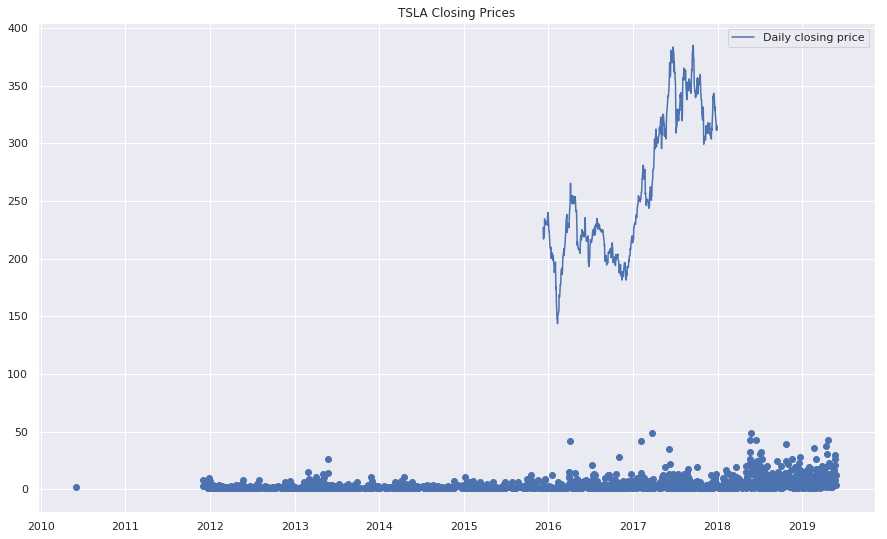

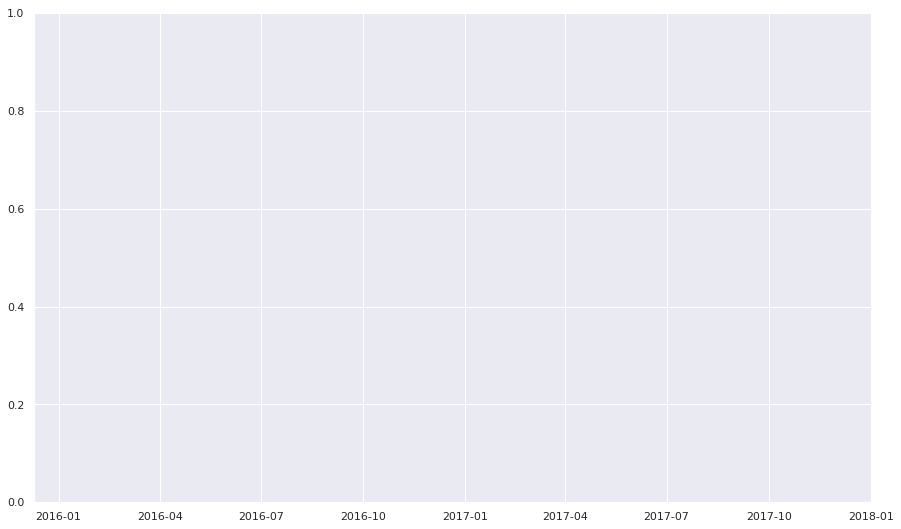

In [32]:
start_date = datetime.datetime(2015,12,10) # Beginning of period 
end_date = datetime.datetime(2018,1,1)

stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start_date, end_date=end_date) #download data with quandl
from pylab import *

pylab.rcParams['figure.figsize'] = (15, 9)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.scatter(tweet_date,tweet_count);

plt.legend()
plt.show()
#plt.title("Number of tweets per day")
plt.xlim(start_date,end_date);

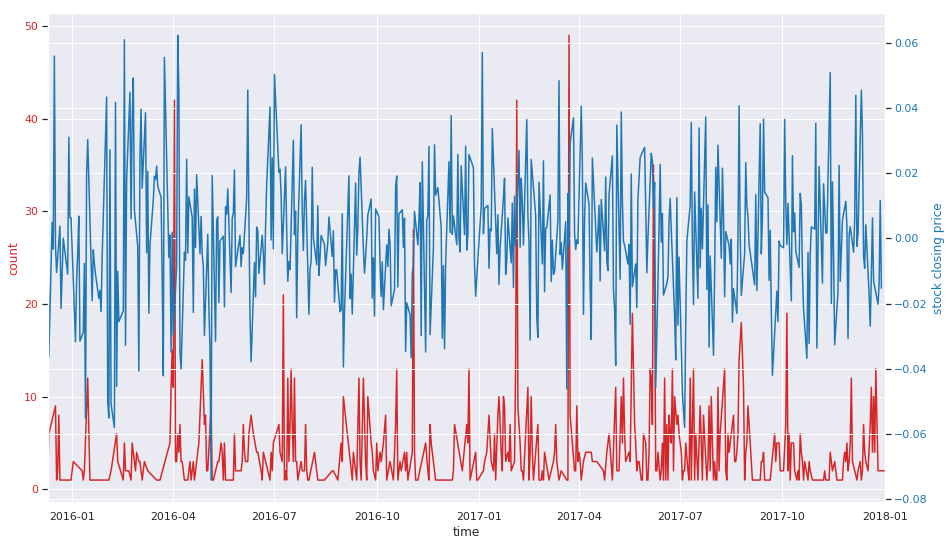

In [37]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('count', color=color)
ax1.plot(tweet_date, tweet_count, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot((data["Close"]-data["Open"])/data["Open"],label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(start_date,end_date);


In [39]:
len(tweet_count)
len
#plt.scatter(tweet_count,data["Close"])

1363